In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/number-of-natural-disaster-events.csv'
data = pd.read_csv(url) #untuk membaca data dari file CSV (url)

In [3]:
df = pd.DataFrame(data) #untuk membuat objek DataFrame, yang merupakan struktur data tabular dengan baris dan kolom.

In [4]:
df

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2
...,...,...,...,...
823,Wildfire,NaN,2014,4
824,Wildfire,NaN,2015,12
825,Wildfire,NaN,2016,10
826,Wildfire,NaN,2017,13


In [5]:
numerical_vars = ['Year', 'Number of reported natural disasters (reported disasters)']
categorical_vars = ['Entity', 'Code']

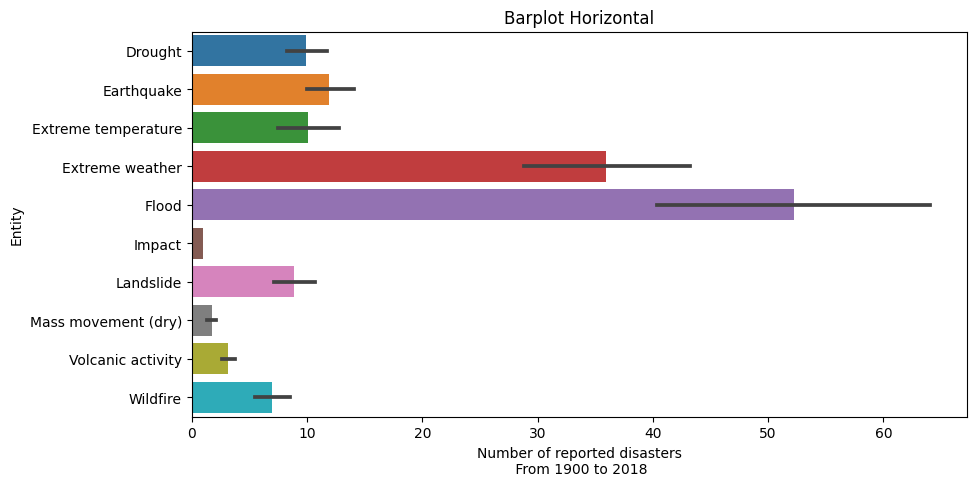

In [6]:
# Menghapus entitas "All natural disasters" dari DataFrame
df = df[df['Entity'] != 'All natural disasters']
# Pembuatan Barplot Horizontal
plt.figure(figsize=(10, 5))
sns.barplot(x='Number of reported natural disasters (reported disasters)', y='Entity', data=df)
plt.title('Barplot Horizontal')
plt.xlabel('Avarage Number of reported disasters\n From 1900 to 2018')
plt.ylabel('Entity')
plt.show()

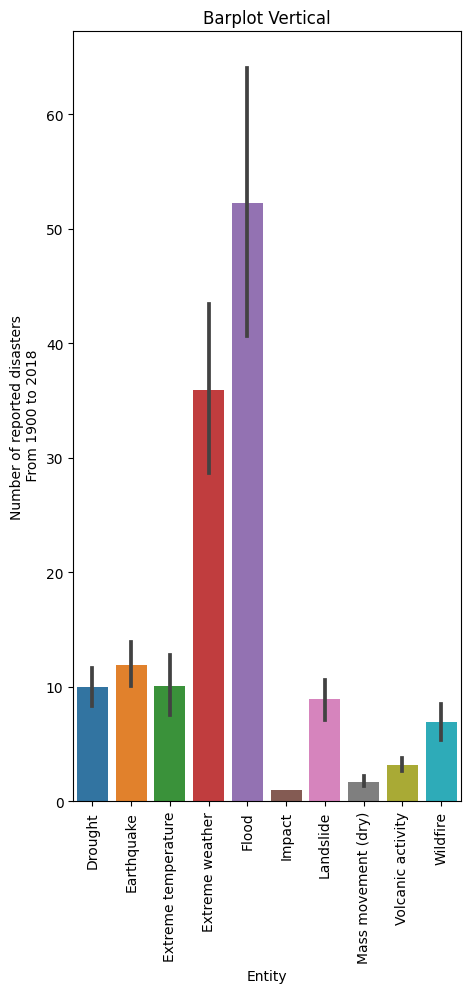

In [7]:
# Pembuatan Barplot Vertikal
plt.figure(figsize=(5, 10))
sns.barplot(x='Entity', y='Number of reported natural disasters (reported disasters)', data=df)
plt.title('Barplot Vertical')
plt.xlabel('Entity')
plt.ylabel('Avarage Number of reported disasters\n From 1900 to 2018')
plt.xticks(rotation=90)
plt.show()

<ipython-input-8-9a6dcecfbc32>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'], bins=10, kde=False) #kde false untuk mehilangkan garis pada histogram


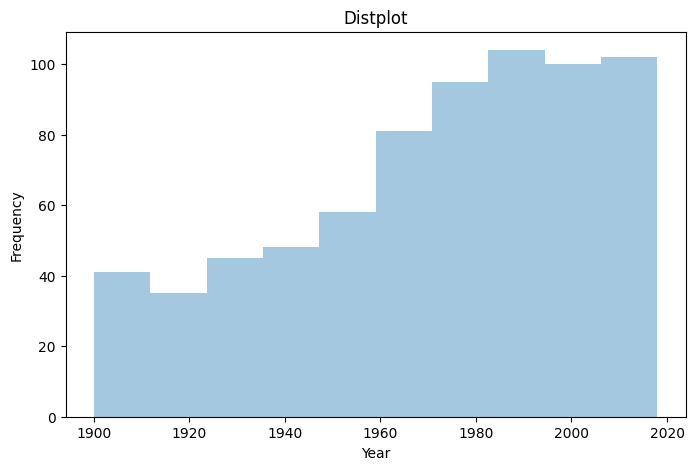

In [8]:
# Pembuatan Distplot
plt.figure(figsize=(8, 5))
sns.distplot(df['Year'], bins=10, kde=False) #kde false untuk mehilangkan garis pada histogram
plt.title('Distplot')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


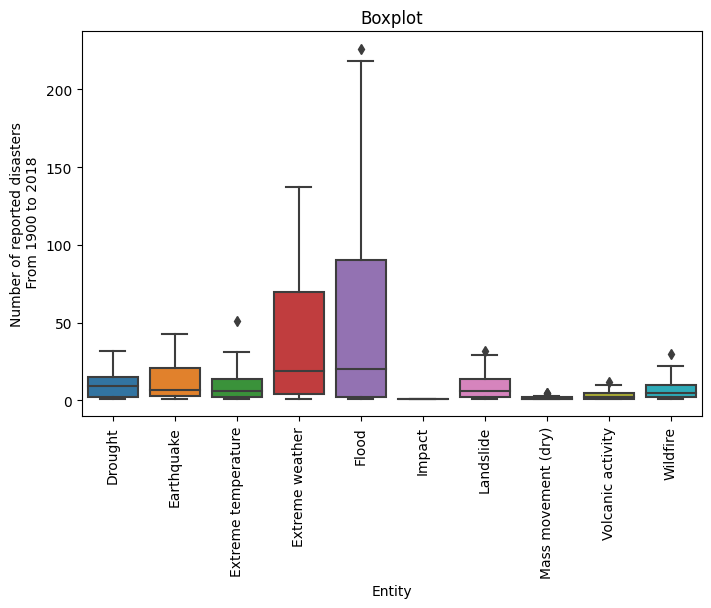

In [9]:
# Pembuatan Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Entity', y='Number of reported natural disasters (reported disasters)', data=df)
plt.title('Boxplot')
plt.xlabel('Entity')
plt.ylabel('Avarage Number of reported disasters\n From 1900 to 2018')
plt.xticks(rotation=90)
plt.show()

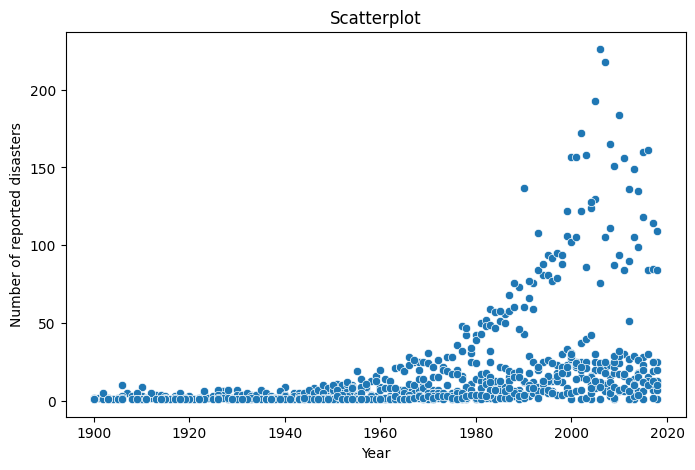

In [10]:
# Pembuatan Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Year', y='Number of reported natural disasters (reported disasters)', data=df)
plt.title('Scatterplot')
plt.xlabel('Year')
plt.ylabel('Number of reported disasters')
plt.show()

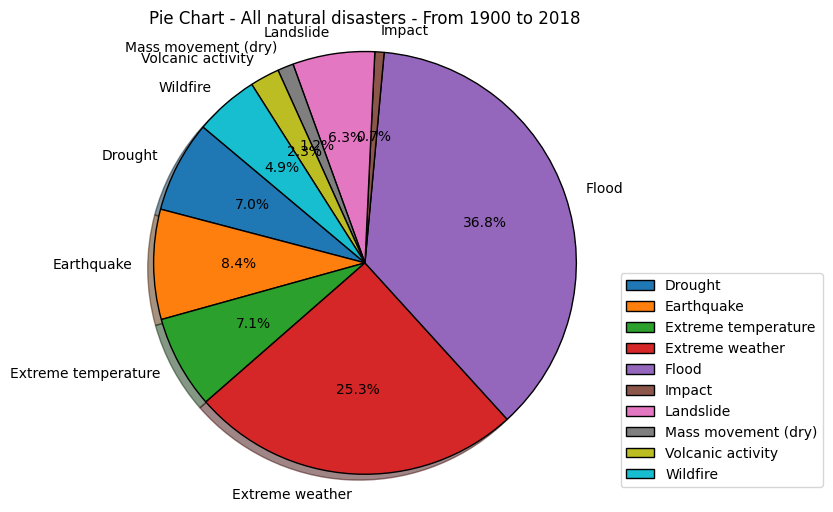

In [11]:
# Menggabungkan entitas yang sama dan menghitung rata-rata/persentase
df_grouped = df.groupby('Entity')['Number of reported natural disasters (reported disasters)'].mean().reset_index()
# Pembuatan Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df_grouped['Number of reported natural disasters (reported disasters)'], labels=df_grouped['Entity'],
        autopct='%1.1f%%', startangle=140,
        shadow=True,
        wedgeprops={'edgecolor': 'black'})
plt.title('Pie Chart - All natural disasters - From 1900 to 2018')
plt.axis('equal')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

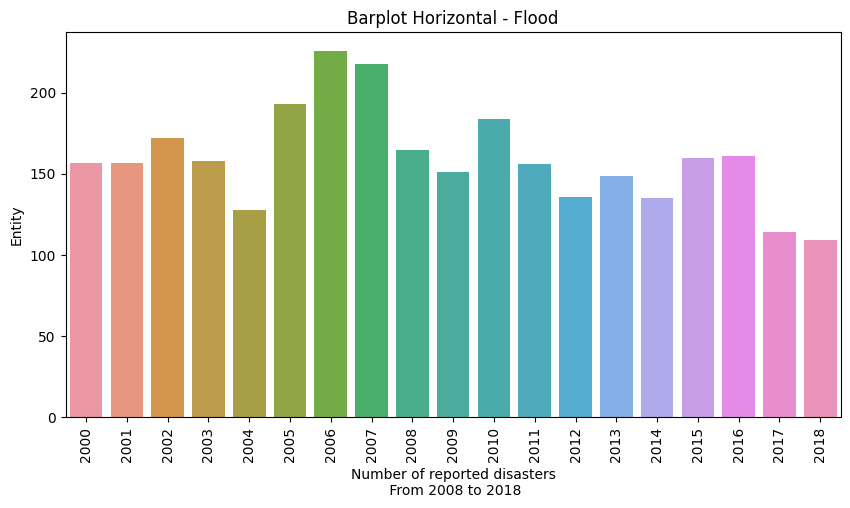

In [17]:
# Filter DataFrame untuk hanya memuat data 'Flood' krn flood sering terjadi
# terlihat pada scatterplot bahwa tahun 2000 - 2018 paling banyak terjadi bencana
df_filtered = df[df['Entity'] == 'Flood']

# Ambil tahun terakhir dalam DataFrame
latest_year = df_filtered['Year'].max()

# Hitung tahun awal yang akan ditampilkan (10 tahun ke belakang)
start_year = latest_year - 18

# Filter DataFrame untuk hanya memuat data 10 tahun ke belakang
df_filtered = df_filtered[df_filtered['Year'] >= start_year]
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Number of reported natural disasters (reported disasters)', data=df_filtered)
plt.title('Barplot Horizontal - Flood')
plt.xlabel('Number of reported disasters\n From 2000 to 2018')
plt.ylabel('Entity')
plt.xticks(rotation=90)
plt.show()